# 🌍 MarocExplorer_Data  
Bienvenue dans le notebook **MarocExplorer_Data** ! Ce projet vise à explorer, traiter et enrichir un ensemble de données d'images géolocalisées provenant du **Maroc**.  

## 💡 Contexte  
Le projet **MarocExplorer** a pour objectif de créer un modèle capable de **reconnaître les lieux marocains** en utilisant des images annotées par leurs **coordonnées géographiques**.  
Cependant, le principal défi a été l'**absence d'une source directe** d'images marocaines avec des informations géospatiales complètes.  
Pour surmonter ce défi, nous avons construit notre **propre dataset** en collectant des images depuis la source la plus **riche** et **complète**

---

## 📊 Objectifs du Notebook  
Ce notebook est consacré à la **gestion des données** du projet **MarocExplorer** en utilisant exclusivement le **dataset OSV5M**. Il s'articule autour des étapes suivantes :  
1. **Collecte des données** : Extraction d'images marocaines depuis le dataset OSV5M.  
2. **Enrichissement** : Association des images avec leur **ville** et ajout de **métadonnées contextuelles**.  
3. **Visualisation** : Représentation géographique et statistique des données collectées.  
4. **Sauvegarde** : Exportation du dataset enrichi pour l'entraînement du modèle.  

---

## 🔗 Source des Données  
Pour ce notebook, nous nous concentrons uniquement sur la source suivante :  
- [**OSV5M Dataset de Hugging Face**](https://huggingface.co/datasets/osv5m/osv5m/tree/main)  

---

## 📌 Pourquoi ce Notebook ?  
Ce notebook permet de **documenter l'intégralité du processus de gestion des données** en se basant sur le dataset **OSV5M de Hugging Face**.  
Il servira de **référence** pour la préparation des données et l'entraînement du modèle final.  
Les résultats obtenus ici garantiront la qualité et la diversité des données pour la phase de **modélisation**.  

---

## 📝 Structure du Notebook  
- **Partie 1 : Collecte des données depuis OSV5M**  
- **Partie 2 : Enrichissement des données avec les informations géographiques**  
- **Partie 3 : Visualisation géographique des images**  
- **Partie 4 : Exportation du dataset final**  

---

🚀 **Commençons !**  


#Collecte des données depuis OSV5M

**Transformation des données  :**

1. **Changement de la colonne `unique_country`**  
   - Remplacer le **code du pays** par son **nom complet** pour rendre les données plus lisibles et compréhensibles.  

2. **Sélection des colonnes importantes**  
   - Conserver uniquement les colonnes suivantes :  
     - **`id`** : Identifiant de l'image (nom).  
     - **`latitude`** et **`longitude`** : Coordonnées géographiques de l'image.  
     - **`unique_country`** : Nom complet du pays.  


In [ ]:
#@title Modification de la colonne **unique_country** et conservation des colonnes importantes
import pandas as pd
import pycountry

# Liste des codes pays
country_codes = ['MG', 'KZ', 'IT', 'ML', 'TH', 'SL', 'FR', 'MX', 'CI', 'JP', 'IN', 'CN', 'ZA', 'DZ',
 'AU', 'IS', 'US', 'CD', 'CM', 'MM', 'NZ', 'RU', 'NC', 'CO', 'CL', 'UG', 'TZ', 'PH',
 'AO', 'PY', 'HN', 'BG', 'BR', 'NG', 'GN', 'MA', 'CA', 'TM', 'TN', 'TD', 'MW', 'PG',
 'GH', 'PA', 'MK', 'KW', 'TR', 'GM', 'ZM', 'EC', 'VU', 'AZ', 'YE', 'ET', 'ES', 'PE',
 'SZ', 'KR', 'BO', 'GE', 'AR', 'MN', 'TL', 'LS', 'CR', 'SO', 'MD', 'NO', 'EE', 'CF',
 'SA', 'RW', 'SE', 'VE', 'SN', 'IR', 'DE', 'BF', 'FI', 'BD', 'ID', 'NI', 'KG', 'TW',
 'RS', 'SB', 'PK', 'RO', 'MY', 'NE', 'JO', 'CX', 'UZ', 'EG', 'SD', 'KE', 'LK', 'KH',
 'VC', 'LY', 'LC', 'CU', 'GB', 'SK', 'CV', 'PL', 'MZ', 'GR', 'OM', 'SV', 'VN', 'TG',
 'TO', 'LA', 'UA', 'DK', 'GT', 'MV', 'LV', 'IE', 'BW', 'HR', 'LT', 'ZW', 'DO', 'BA',
 'TV', 'TT', 'BY', 'UY', 'ST', 'WS', 'CW', 'IQ', 'AT', 'NL', 'CZ', 'GL', 'GQ', 'FO',
 'SR', 'AW', 'LB', 'PT', 'CY', 'IL', 'BS', 'DJ', 'TJ', 'SI', 'FK', 'PF', 'KY', 'NP',
 'AF', 'GP', 'GW', 'KI', 'VG', 'SS', 'TC', 'GF', 'BE', 'FM', 'ME', 'HU', 'BM', 'CG',
 'PR', 'BZ', 'GY', 'PS', 'BI', 'AE', 'LU', 'AM', 'KN', 'KM', 'HT', 'MR', 'AG', 'ER',
 'SG', 'AL', 'PW', 'BN', 'KP', 'MQ', 'FJ', 'HK', 'MT', 'AX', 'GD', 'BT', 'JM', 'SJ',
 'DM', 'CH', 'VI', 'MU', 'LR', 'BB', 'BJ', 'QA', 'YT', 'XK', 'RE', 'JE', 'GG', 'MS',
 'BQ', 'GA', 'VA', 'SX', 'SY', 'BH', 'AI', 'IM', 'MF']

# Fonction pour obtenir le nom du pays
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except AttributeError:
        return code  # Garde le code si le pays n'est pas trouvé

# Création du mapping de remplacement
country_mapping = {code: get_country_name(code) for code in country_codes}


data_path = r"C:\Users\hp\Desktop\train.csv"
df = pd.read_csv(data_path)
df = df[['id', 'latitude', 'longitude' ,'unique_country']]
df['unique_country'].replace(country_mapping, inplace=True)
print(df['unique_country'].unique())

output_path = r"C:\Users\hp\Desktop\train_comp.csv"

df.to_csv(output_path, index=False)


print(df)


**Extraction des images et des fichiers CSV :**

Les images du dataset sont **enregistrées dans des dossiers compressés (.zip)**, avec un **fichier CSV unique** correspondant dans chaque archive.  
Pour pouvoir traiter les données efficacement, nous avons réalisé les étapes suivantes :  

1. **Séparation et extraction des fichiers**  
   - Décompresser chaque dossier `.zip` pour accéder aux images.  
   - Extraire le fichier CSV associé dans le même répertoire.  

2. **Code d'extraction**  
   Voici un extrait de code pour automatiser ce processus :  


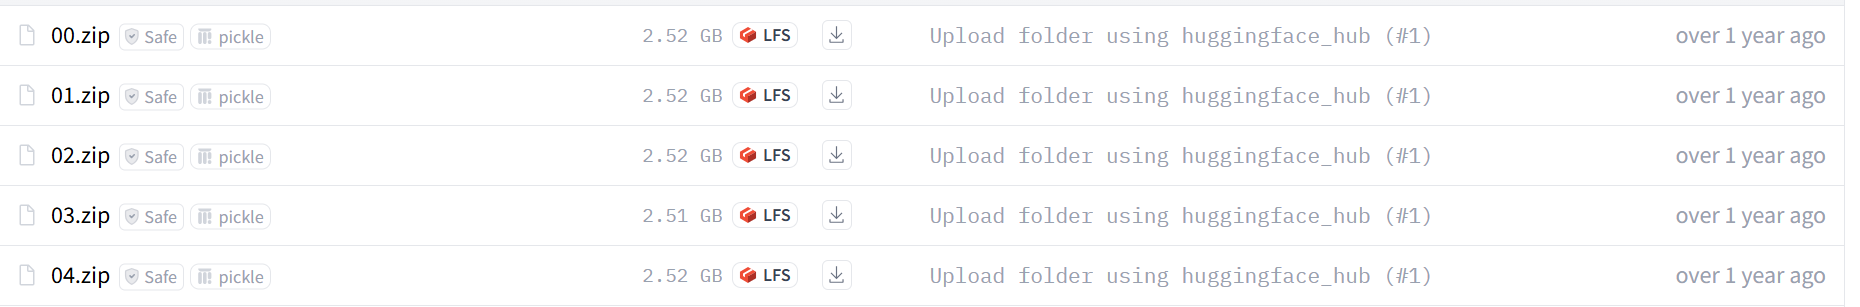

In [ ]:
#@title Extraction des fichiers **CSV** depuis pour dossier **.zip**
import os
import pandas as pd
import zipfile

# Variables à modifier selon votre configuration
main_folder = r"C:\Users\hp\Desktop\Data_maroc"# Chemin vers le dossier principal
folders_to_process = ['00', '01', '02', '03', '04']  # Dossiers à traiter

# Charger le fichier CSV principal
csv_files = [f for f in os.listdir(main_folder) if f.endswith('.csv')]
if not csv_files:
    print("Aucun fichier CSV trouvé dans le dossier principal.")
    exit()

main_csv_path = os.path.join(main_folder, csv_files[0])
print(f"Chargement du fichier CSV principal: {main_csv_path}")
df_main = pd.read_csv(main_csv_path)

# Traiter chaque dossier
for folder_name in folders_to_process:
    zip_path = os.path.join(main_folder, f"{folder_name}.zip")

    if not os.path.exists(zip_path):
        print(f"Le fichier {zip_path} n'existe pas. Passage au suivant.")
        continue

    print(f"Traitement du fichier ZIP {folder_name}.zip...")

    # Obtenir la liste des IDs d'images dans ce fichier ZIP
    image_ids = []

    # Lire le contenu du ZIP sans l'extraire
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Parcourir tous les fichiers dans le ZIP
        for file_info in zip_ref.infolist():
            # Vérifier si c'est une image
            file_name = os.path.basename(file_info.filename)
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff', '.bmp', '.gif')):
                # Extraire l'ID (nom du fichier sans extension)
                image_id = os.path.splitext(file_name)[0]
                image_ids.append(image_id)

    image_ids = list(map(int, image_ids))

    # Créer un mini CSV pour ce dossier
    if image_ids:
        print(f"Création du mini fichier CSV pour le dossier {folder_name}...")
        # Filtrer le CSV principal pour ne garder que les lignes correspondant aux IDs des images de ce dossier
        df_ids = pd.DataFrame(image_ids, columns=['id'])

        # Faire une jointure sur la colonne 'id'
        df_folder = pd.merge(df_main, df_ids, on='id', how='inner')

        # Sauvegarder le mini CSV dans le dossier principal
        folder_csv_path = os.path.join(main_folder, f"{folder_name}_data.csv")
        df_folder.to_csv(folder_csv_path, index=False)
        print(f"Fichier CSV créé: {folder_csv_path}")
        print(f"Nombre d'images identifiées: {len(image_ids)}, Nombre de lignes CSV: {len(df_folder)}")
    else:
        print(f"Aucune image trouvée dans le fichier ZIP {folder_name}.zip")

print("Traitement terminé!")

**Création du dossier d'images marocaines :**

La prochaine étape consiste à **créer un dossier** qui contient uniquement les **images marocaines** extraites du dataset.  
Nous allons également générer un **fichier CSV** contenant les **métadonnées** correspondantes (ID de l'image, coordonnées géographiques et pays).  


In [ ]:
#@title Création du dossier d'images marocaines et du fichier CSV correspondant
import os
import shutil
import zipfile
import pandas as pd

def ajouter_images_maroc(input_path, output_path):
    # Vérifier si le dossier de sortie existe, sinon le créer
    os.makedirs(output_path, exist_ok=True)

    # Vérifier si le sous-dossier des images existe, sinon le créer
    images_folder = os.path.join(output_path, "images")
    os.makedirs(images_folder, exist_ok=True)

    # Vérifier si un CSV existe déjà
    csv_output = os.path.join(output_path, "maroc_data.csv")
    df_existant = None
    if os.path.exists(csv_output):
        print(f"Fichier CSV existant trouvé: {csv_output}")
        df_existant = pd.read_csv(csv_output)
        print(f"Le CSV existant contient {len(df_existant)} lignes")

    # Créer un DataFrame pour stocker les nouvelles lignes du Maroc
    df_nouveau = None

    # Parcourir tous les dossiers (00 à 12)
    for folder_num in range(71,98):  # 0 à 12
        folder_name = f"{folder_num:02d}"  # Format à deux chiffres: 00, 01, etc.

        # Chemin du dossier compressé
        zip_path = os.path.join(input_path, f"{folder_name}.zip")

        # Chemin du fichier CSV
        csv_path = os.path.join(input_path, f"{folder_name}_data.csv")

        # Dossier temporaire pour extraction
        temp_folder = os.path.join(input_path, f"temp_{folder_name}")

        print(f"Traitement du dossier {folder_name}...")

        try:
            # Vérifier si les fichiers existent
            if not os.path.isfile(csv_path):
                print(f"Fichier CSV non trouvé: {csv_path}")
                continue

            if not os.path.isfile(zip_path):
                print(f"Fichier ZIP non trouvé: {zip_path}")
                continue

            # Lire le CSV et filtrer pour le Maroc
            df = pd.read_csv(csv_path)

            # Filtrer les lignes pour le Maroc
            maroc_rows = df[(df['unique_country'].str.lower() == 'morocco') |
                           (df['unique_country'].str.lower() == 'maroc')]

            # Si on a trouvé des images du Maroc
            if not maroc_rows.empty:
                print(f"Trouvé {len(maroc_rows)} images du Maroc dans {folder_name}")

                # Extraire le dossier compressé
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    zip_ref.extractall(temp_folder)

                # Copier les images correspondantes
                copied_count = 0
                skipped_count = 0
                for _, row in maroc_rows.iterrows():
                    image_id = str(row['id']) if 'id' in row else None

                    if image_id:
                        # Chercher l'image dans le dossier extrait
                        for root, _, files in os.walk(temp_folder):
                            for file in files:
                                if file.startswith(image_id):
                                    src_path = os.path.join(root, file)
                                    dst_path = os.path.join(images_folder, file)

                                    # Vérifier si l'image existe déjà
                                    if os.path.exists(dst_path):
                                        skipped_count += 1
                                    else:
                                        shutil.copy2(src_path, dst_path)
                                        copied_count += 1

                print(f"Copié {copied_count} nouvelles images, ignoré {skipped_count} images déjà existantes")

                # Ajouter les lignes au DataFrame principal
                if df_nouveau is None:
                    df_nouveau = maroc_rows
                else:
                    df_nouveau = pd.concat([df_nouveau, maroc_rows])
            else:
                print(f"Aucune image du Maroc trouvée dans {folder_name}")

            # Nettoyer le dossier temporaire
            if os.path.exists(temp_folder):
                shutil.rmtree(temp_folder)

        except Exception as e:
            print(f"Erreur lors du traitement de {folder_name}: {e}")

    # Fusionner avec le CSV existant et enregistrer
    if df_nouveau is not None and not df_nouveau.empty:
        if df_existant is not None:
            # Identifier les lignes uniques à ajouter (éviter les doublons)
            # On utilise 'id' comme identifiant unique
            ids_existants = set(df_existant['id'].astype(str))
            df_a_ajouter = df_nouveau[~df_nouveau['id'].astype(str).isin(ids_existants)]

            if not df_a_ajouter.empty:
                df_final = pd.concat([df_existant, df_a_ajouter])
                df_final.to_csv(csv_output, index=False)
                print(f"CSV mis à jour avec {len(df_a_ajouter)} nouvelles lignes. Total: {len(df_final)} lignes")
            else:
                print("Aucune nouvelle ligne à ajouter au CSV existant")
        else:
            # Aucun CSV existant, créer un nouveau
            df_nouveau.to_csv(csv_output, index=False)
            print(f"Nouveau CSV créé avec {len(df_nouveau)} lignes")
    elif df_existant is None:
        print("Aucune donnée du Maroc trouvée dans tous les dossiers.")

    print(f"Extraction terminée. Les images du Maroc sont disponibles dans: {images_folder}")
    print(f"Les données CSV sont disponibles dans: {csv_output}")

# Utilisation
if __name__ == "__main__":
    # Chemins
    input_path = r"C:\Users\hp\Desktop\Nouveau dossier"  # Nouveau dossier d'entrée
    output_path = r"C:\Users\hp\Desktop\Data_maroc"      # Dossier de sortie existant

    ajouter_images_maroc(input_path, output_path)

#Enrichissement des données avec les informations géographiques

Pour améliorer la **qualité des données**, nous ajoutons une nouvelle information : la **ville** associée à chaque image.  
Pour cela, nous avons besoin des **coordonnées des villes marocaines** :  
- Source des données : [Coordonnées des villes marocaines](https://simplemaps.com/data/ma-citi)

**Méthode d'association :**
Nous associons à chaque image la **ville la plus proche** en calculant la **distance de Haversine** entre les coordonnées de l'image et celles des villes.  

La formule de la distance de Haversine entre deux points géographiques est la suivante :  
$$
d = 2r \cdot \arcsin \left(\sqrt{\sin^2 \left(\frac{\Delta \phi}{2}\right) + \cos(\phi_1) \cdot \cos(\phi_2) \cdot \sin^2 \left(\frac{\Delta \lambda}{2}\right)}\right)
$$

Où :

*   **`r`** est le rayon de la Terre (environ 6371 km).
*   **`φ₁`**, **`φ₂`** sont les latitudes en radians.
*   **`Δφ`** est la différence entre les latitudes.
*   **`Δλ`** est la différence entre les longitudes.  

Nous associons ensuite à chaque image la **ville avec la distance minimale**.  


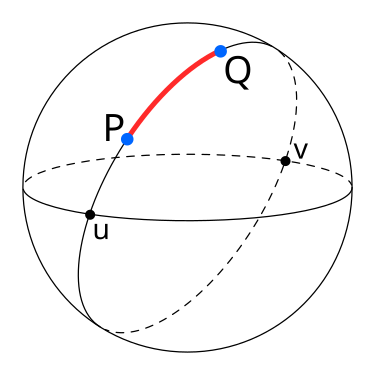

In [ ]:
#@title La fonction Haversine

import pandas as pd
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # rayon de la Terre en kilomètres
    return c * r


In [ ]:
#@title Ajout des villes en fonction des coordonnées géographiques
import pandas as pd
import numpy as np

# Chargement de ta dataframe villes
villes_df = pd.read_csv(r"C:\Users\hp\Desktop\ma.csv")  # Doit contenir : city, lat, lng, etc.

# Chargement de ta dataframe des points
points_df = pd.read_csv(r"C:\Users\hp\Desktop\Data_maroc\maroc_data.csv")  # Doit contenir : latitude, longitude
points_df = points_df.drop('unique_country' , axis=1)

# Fonction pour trouver la ville la plus proche
def trouver_ville_proche(lat, lon, villes_df):
    distances = haversine_distance(lat, lon, villes_df['lat'].values, villes_df['lng'].values)
    idx_min = np.argmin(distances)
    return villes_df.iloc[idx_min]['city']

# Appliquer la fonction à tous les points
points_df['city'] = points_df.apply(lambda row: trouver_ville_proche(row['latitude'], row['longitude'], villes_df), axis=1)

# Résultat
print(points_df)

points_df.to_csv(r'C:\Users\hp\Desktop\maroc_data_finale.csv', index=False)


**Collecte des données des villes :**

Pour chaque ville, nous avons collecté les informations **manuellement** en recherchant sur diverses **sources internet** fiables.  
Cette étape était nécessaire pour obtenir des **données précises** et **complètes** sur les villes marocaines.


In [ ]:
#@title Aperçu des données des villes
import pandas as pd

Path_data = "/content/M_villes_avec_coords.csv"
Data_ville = pd.read_csv(Path_data)
print("La dimmention est : " , Data_ville.shape)
print("Les colonnes du dataset : ")
print(Data_ville.columns)
display(Data_ville.head())
print(Data_ville.info())

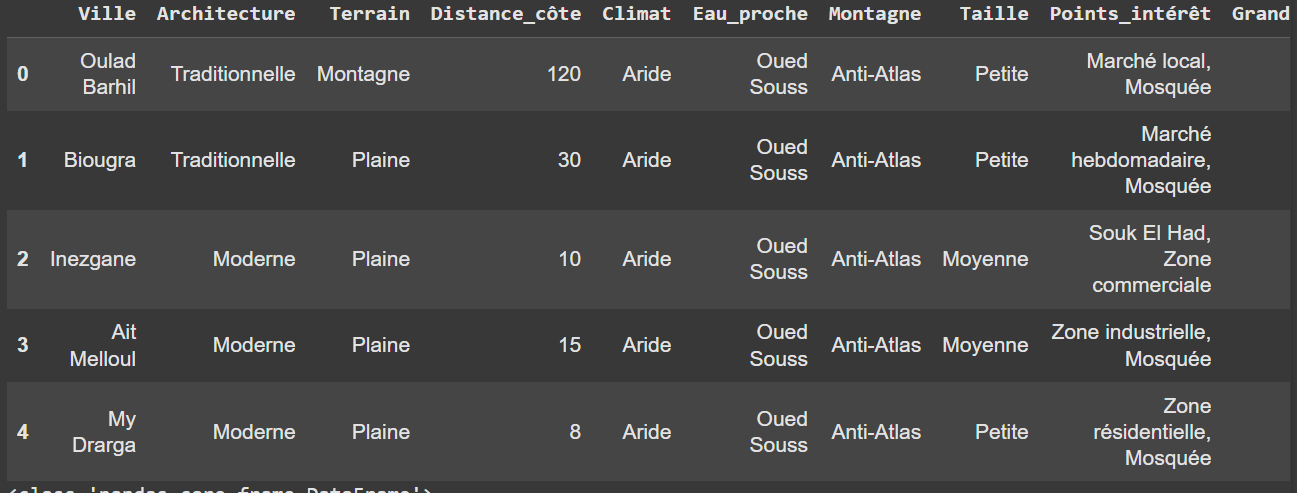

# Représentation géographique et statistique des données collectées.

In [ ]:
#@title Répartition des données selon la latitude et la longitude
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supposons que ton DataFrame s'appelle df
data_maroc = pd.read_csv('/kaggle/input/data-morroco/Data_maroc/maroc_data_finale.csv')

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(data_maroc['longitude'], data_maroc['latitude'], c='blue', edgecolors='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
#@title Distribution des villes par nombre d'échantillons (par groupes de 10)

import pandas as pd
import matplotlib.pyplot as plt
import math

# Lire le fichier de données
data = pd.read_csv('/content/maroc_data_finale.csv')

# Afficher les premières lignes pour vérifier
display(data.head())

# Compter le nombre d'échantillons par ville
ville_distribution = data['city'].value_counts()

# Déterminer le nombre de graphiques nécessaires (10 villes par graphique)
n = 10  # Nombre de villes par graphique
num_plots = math.ceil(len(ville_distribution) / n)

# Afficher les graphiques par groupes de 10 villes
for i in range(num_plots):
    plt.figure(figsize=(10, 6))
    start = i * n
    end = start + n
    ville_distribution[start:end].plot(kind='bar', color='skyblue')
    plt.title(f'Distribution des villes (échantillons {start + 1} à {min(end, len(ville_distribution))})')
    plt.xlabel('Ville')
    plt.ylabel('Nombre d\'échantillons')
    plt.xticks(rotation=45)
    plt.show()
